In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [50]:
portfolio1 = pd.read_csv('../data/raw/estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('../data/raw/estaticos_portfolio2.csv')
portfolio3 = pd.read_csv('../data/raw/estaticos_portfolio3.csv')
market     = pd.read_csv('../data/raw/estaticos_market.csv')

In [51]:
names = ['portfolio1', 'portfolio2', 'portfolio3', 'market']
dfs   = [portfolio1, portfolio2, portfolio3, market]
for name, df in zip(names, dfs) :
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(name, 'has {} rows and {} columns'.format(*df.shape))

portfolio1 has 555 rows and 181 columns
portfolio2 has 566 rows and 1 columns
portfolio3 has 265 rows and 1 columns
market has 462298 rows and 181 columns


In [53]:
def get_metadata(df, features=None):
    df = df.copy()
    if features is None:
        features = list(df.columns)
    total_missing = df[features].isnull().sum()
    percent_missing = (df[features].isnull().sum()/df[features].isnull().count())
    distinct_values = df.nunique(dropna=False)
    types = df.dtypes
    meta_data = pd.concat([total_missing, percent_missing, distinct_values, types],
                          axis=1, keys=['Total Missing', 'Percent Missing', 'Distinct Values', 'Type'])
    return meta_data.sort_values('Percent Missing', ascending=False)

In [55]:
metadata = get_metadata(portfolio1)
metadata['Percent Missing'].unique()

array([1.        , 0.9981982 , 0.9963964 , 0.99459459, 0.99279279,
       0.98738739, 0.97477477, 0.97297297, 0.96216216, 0.96036036,
       0.95855856, 0.95495495, 0.94414414, 0.94234234, 0.94054054,
       0.93333333, 0.93153153, 0.92432432, 0.92252252, 0.91711712,
       0.91171171, 0.90990991, 0.9027027 , 0.88828829, 0.88648649,
       0.84504505, 0.83603604, 0.82522523, 0.81801802, 0.76396396,
       0.73693694, 0.65765766, 0.64324324, 0.35135135, 0.34774775,
       0.27027027, 0.26486486, 0.18198198, 0.11531532, 0.08468468,
       0.04504505, 0.01981982, 0.00720721, 0.        ])

**Getting Features Below 60% of Missing Values**

In [56]:
use_features = list(metadata[metadata['Percent Missing'] < .60].index)
df_portfolio1 = portfolio1[use_features].reset_index()

In [67]:
df_portfolio1_meta = get_metadata(df_portfolio1)
df_portfolio1_meta[df_portfolio1_meta['Total Missing'] > 0]

,Total Missing,Percent Missing,Distinct Values,Type
qt_socios_st_regular,195,0.351351,6,float64
idade_minima_socios,193,0.347748,60,float64
idade_maxima_socios,193,0.347748,63,float64
idade_media_socios,193,0.347748,81,float64
empsetorcensitariofaixarendapopulacao,150,0.270270,392,float64
qt_socios,147,0.264865,7,float64
qt_socios_pf,147,0.264865,7,float64
qt_socios_pj,147,0.264865,4,float64
fl_optante_simples,101,0.181982,3,object
fl_optante_simei,101,0.181982,3,object


In [82]:
len(list(df_portfolio1_meta[df_portfolio1_meta['Type'] == 'float64'].index))

12

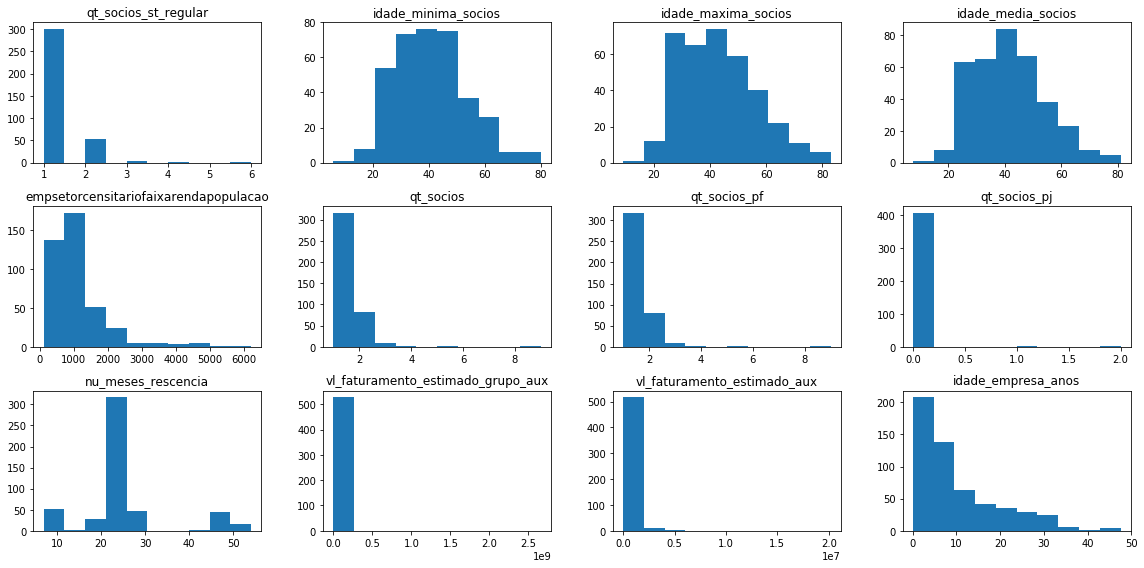

In [115]:
cols = list(df_portfolio1_meta[df_portfolio1_meta['Type'] == 'float64'].index)

fig = plt.figure(figsize=(16,8))

for col, num in zip(cols, range(1,13)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df_portfolio1[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()